In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import math

In [2]:
hdulist = fits.open('../petroC_nsa_gzoo.fits')
tbdata = hdulist[1].data
color = tbdata['col10'] #^{0.1}(g-r), K-E corrected to z=0.1, petro
M_r = tbdata['col9'] #^{0.1}(M_r) - 5\log h, K-E corrected to z=0.1, petro
pfeatures = tbdata['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
psmooth = tbdata['t01_smooth_or_features_a01_smooth_weighted_fraction']
sSFR = tbdata['B300']
z = tbdata['Z']
hdulist.close()

In [4]:
early_pfeatures = []
early_psmooth = []
late_pfeatures = []
late_psmooth = []
int_pfeatures = []
int_psmooth = []
for i in np.arange(pfeatures.size):
    if z[i] > 0.01 and z[i] < 0.06:
        color_line = 0.7 - 0.032*(M_r[i] + 16.5)
        active_line = -10 + 0.094*(M_r[i] + 15)
        logsSFR = math.log(sSFR[i], 10)
        if color[i] >= color_line: #red galaxies
            if logsSFR <= active_line: #passive galaxies - early type
                early_pfeatures.append(pfeatures[i])
                early_psmooth.append(psmooth[i])
            else: #red and active - intermediate type
                int_pfeatures.append(pfeatures[i])
                int_psmooth.append(pfeatures[i])
        elif logsSFR >= active_line: #blue and active - late type
            late_pfeatures.append(pfeatures[i])
            late_psmooth.append(psmooth[i])

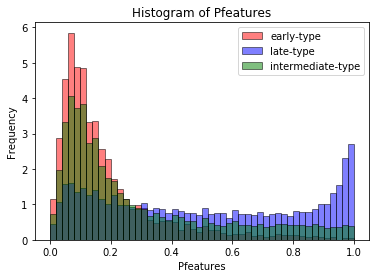

In [5]:
plt.hist(early_pfeatures, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_pfeatures, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_pfeatures, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('Pfeatures')
plt.ylabel('Frequency')
plt.title('Histogram of Pfeatures')
plt.legend(loc='upper right')
plt.show()

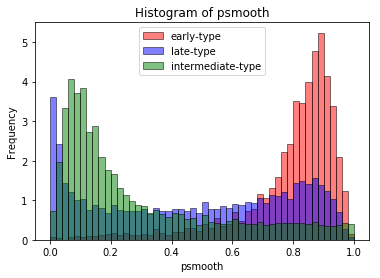

In [6]:
plt.hist(early_psmooth, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_psmooth, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_psmooth, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('psmooth')
plt.ylabel('Frequency')
plt.title('Histogram of psmooth')
plt.legend(loc='upper center')
plt.show()